## Fourier Transform in Numpy

*Main source: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html#additional-resources*

**np.fft.fft2()** provides functionality to transform **input grayscale image** into frequency domain, which will be a complex array. 

Arguments: 
- grayscale image;
- **optional argument** - size of output array. Second argument works in that way:<br>

a) If it is greater than input image, then zero-padding will be applied on original image;<br>
b) If it is less, then original image will be cropped before **FFT (Fast Fourier Transform)**.<br>
Default - same as **original image size**. 

The output will produce **DC argument (average brightness of an image) at the top left corner** of an image.<br>
If we want to move this to a center we need to shift the result to both directions by $N/2$.<br>
We can simply do this with **np.fft.fftshift()**. Once we found frequency transform, we can find **magnitude spectrum**.

Start with **displaying original image**.

In [1]:
! pip install --upgrade numpy

     |████████████████████████████████| 15.1MB 11.6MB/s eta 0:00:01
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3


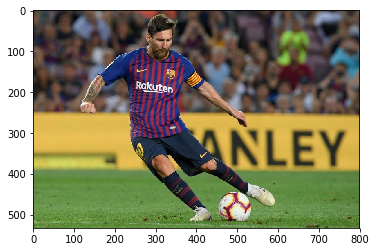

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

img = cv2.imread('example images/messi.jpg')
img_rgb = np.copy(img)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Perform **Fast Fourier Transformation**.<br>
Note, we are using **0** as an argument of imread to read grayscale image 

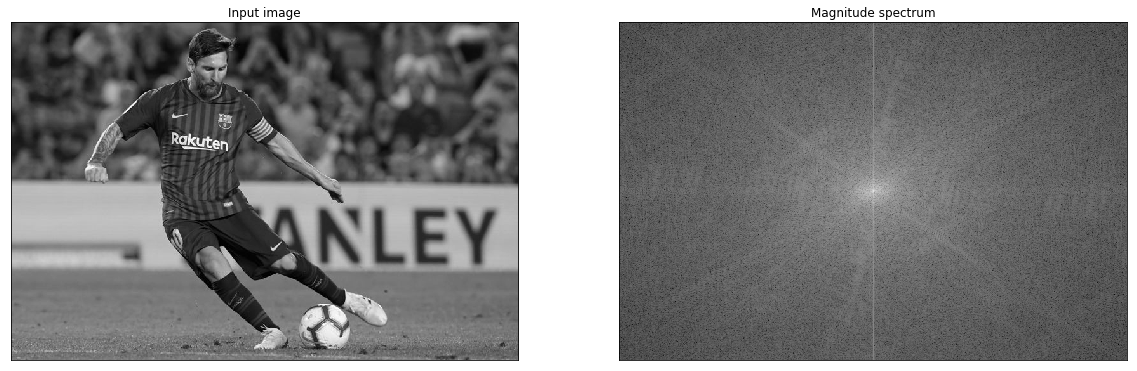

In [8]:
"""
- note, we are using 0 as an argument of cv2.imread() to read grayscale image 

"""
img = cv2.imread('example images/messi.jpg', 0)
# fft module with ff2 (2D-transform of an image) 
f = np.fft.fft2(img)
# next, we perform N/2 shift to display DC in the middle 
fshift = np.fft.fftshift(f)
# calculate magnitude spectrum (contrast based on intensity) 
# comes from Butterworth filter function ("Digital Signal processing" by Babu Durai)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(img, cmap ='gray')
plt.title('Input image')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude spectrum')
plt.xticks([])
plt.yticks([])

plt.show()

**Low frequencies** are usually **around DC point**. Here we see this point as **the brightest one** and it meansm that image shows more low-frequency content here.  <br>
Let's perform Fourier transformation on "Baloons" image as well. 

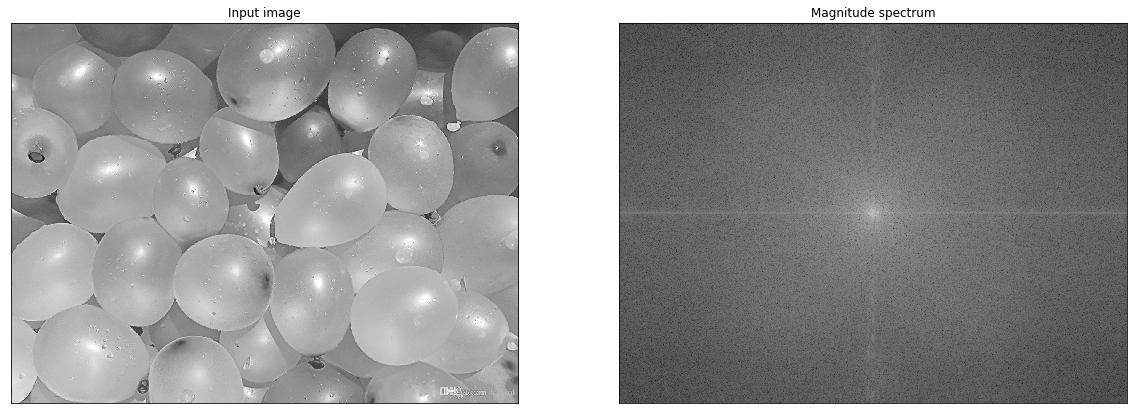

In [10]:
img_baloon = cv2.imread('example images/baloons.jpg', 0)
# fft module with ff2 (2D-transform of an image) 
f = np.fft.fft2(img_baloon)
# next, we perform N/2 shift to display DC in the middle 
fshift = np.fft.fftshift(f)
# calculate magnitude spectrum (contrast based on intensity) 
# comes from Butterworth filter function ("Digital Signal processing" by Babu Durai)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig = plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(img_baloon, cmap ='gray')
plt.title('Input image')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude spectrum')
# apply this to remove x and y axis
plt.xticks([])
plt.yticks([])

plt.show()

Here we see that waves are spread in **right and left directions from DC point** in contrast with previous image, where we saw influence of **clear diagonal waves**. 

Now, we can perform some operations in frequency domain, like: 
 - inverse FT (**image reconstruction**);
 - filters applying: high-pass, low-pass, band-pass. 

**High pass filter example**

We can simply remove low frequencies by creating a **rectangular window mask of 60x60 pixels**, which will remove center elements near DC (low frequencies), **preserving high frequencies** edges, noises, shapes.<br>
Once we are done with rectangle, we need to **shift our rectangle inverselyfrom center to original place** where pixels have been before we made a shift (when we applied np.fft.fftshift(f)). <br>
We are going to use **np.fft.ifftshift()** for inverse rectangular shifting. <br> 
After that, we will use **np.fft.ifft2()** to perform inverse FFT for entire image. 

([], <a list of 0 Text yticklabel objects>)

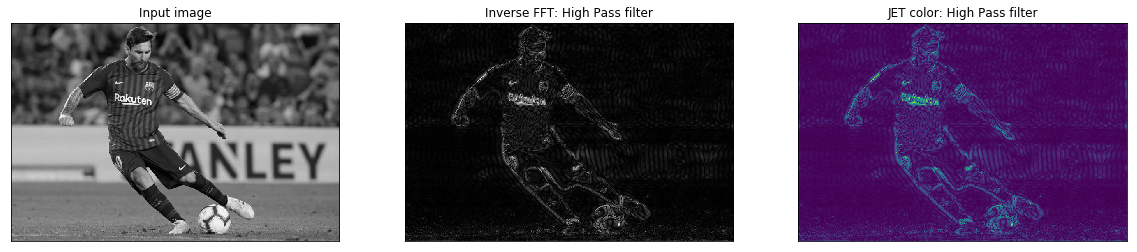

In [26]:
# display number of rows and columns
img = cv2.imread('example images/messi.jpg', 0)
# fft module with ff2 (2D-transform of an image) 
f = np.fft.fft2(img)
# next, we perform N/2 shift to display DC in the middle 
fshift = np.fft.fftshift(f)
# calculate magnitude spectrum (contrast based on intensity) 
# comes from Butterworth filter function ("Digital Signal processing" by Babu Durai)
magnitude_spectrum = 20*np.log(np.abs(fshift))


rows, cols = img.shape 
# now, extract 30 pixels from center as rectangle (center rows (crows) and center columns (ccols))
crows = rows//2
ccols = cols//2
# extract rectangle from resulted FT image (make these pixels black = 0)
fshift[crows-30:crows+30, ccols-30:ccols+30] = 0
# shift rectangle inversly to an original place  
f_ishift  = np.fft.ifftshift(fshift)
# next we will perform np.fft.ifft() for inverse transformation of entire image 
img_back = np.fft.ifft2(f_ishift)
# as a result we get complex number, so we need to take absolute value
img_back = np.abs(img_back)

# display the resulted image 
fig = plt.figure(figsize = (20,8))
plt.subplot(131)
plt.imshow(img, cmap = 'gray')
plt.title('Input image')
plt.xticks([])
plt.yticks([])


plt.subplot(132)
plt.imshow(img_back, cmap = 'gray')
plt.title('Inverse FFT: High Pass filter')
plt.xticks([])
plt.yticks([])

plt.subplot(133)
plt.imshow(img_back)
plt.title('JET color: High Pass filter')
plt.xticks([])
plt.yticks([])

We can see some **ripple structures** an last 2 images (inverse FFTs), especially on the right side.<rb>
This is caused by using rectangular window mask (this mask is converted to sinc shape) and creates **ringing effect**.<br>
In practice, **Gaussian windows** is better option.

## Fourier Transform in OpenCV

OpenCV uses functions **cv2.dft()** and **cv2.idft()** for Fast Fourier and inverse Fast Fourier transformations respectfully. 

Let's perform the same **FFT as we did with OpenCV**:
- first we will convert image into float32 and use flags argument;
- perform N/2 shift of DC from top left corner to a center using np.fft.nfftshift();
- create magnitude spectrum with **cv2.magnitude**

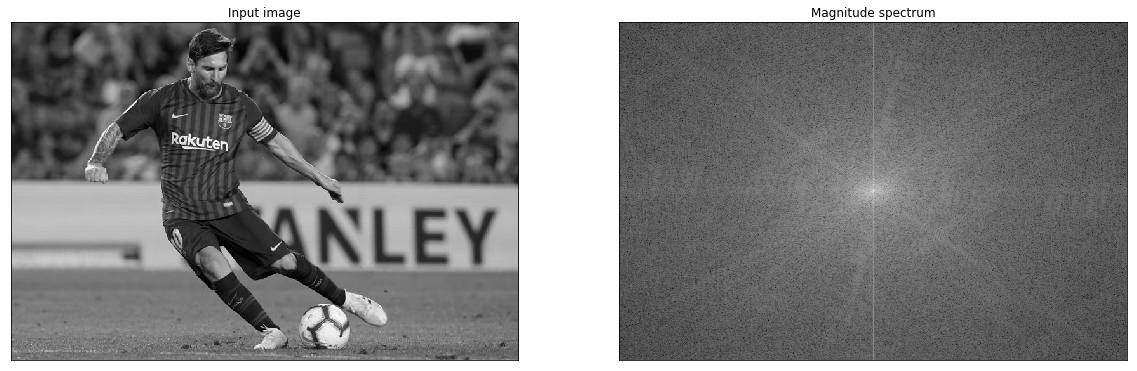

In [35]:
img = cv2.imread('example images/messi.jpg', 0)
# first we will convert image into float32 and use flags argument 
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# perform shifting 
dft_shift = np.fft.fftshift(dft)
# create magnitude spectrum 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

fig = plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(img, cmap ='gray')
plt.title('Input image')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude spectrum')
plt.xticks([])
plt.yticks([])

plt.show()

From operation above using OpenCV we got the same result as with using Numpy.

**Low pass filtering** 

Now when we've already performed high pass filtering, we will preserve low frequencies only, using **Low pass**.<br>
We are going to create a **mask with all pixels around the center (DC) equal to 1**. Rest of pixels will be 0 (black). <br>
Using this way we will isolate low-frequencies. 

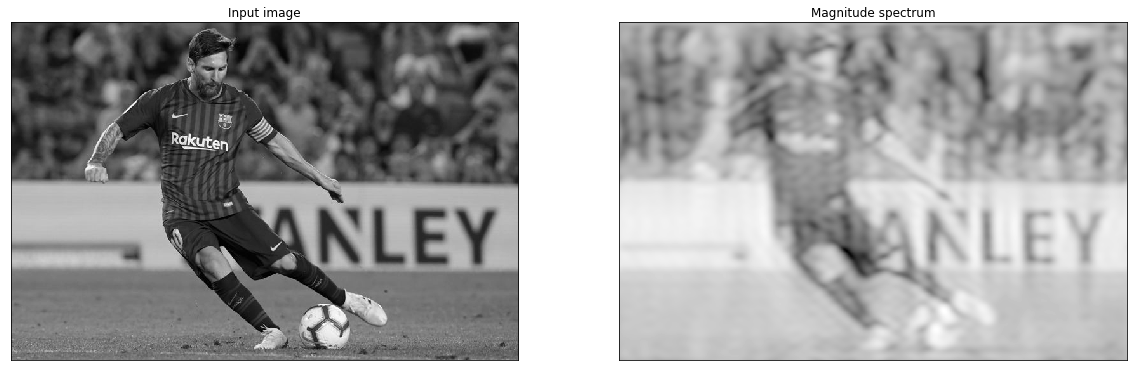

In [45]:
rows, cols = img.shape 
crows = rows//2
ccols = cols//2
# create a mask with all pixels around the center (DC) equal to 1. Rest of pixels will be 0 
mask = np.zeros((rows,cols,2),np.uint8)
mask[crows-30:crows+3, ccols-30:ccols+30] = 1

# then we apply this mask to dft_shift  and perform inverse transformation by pixel (using multiplication)
fshift = dft_shift * mask
# then, we make inverse shift of the box, that we have isolated to locate pixels in original place 
f_ishift = np.fft.ifftshift(fshift)
# finally apply inverse FFT on entire image  
img_back = cv2.idft(f_ishift)
# create magnitude spectrum 
magnitude_spectrum = 20*np.log(cv2.magnitude(img_back[:,:,0], img_back[:,:,1]))

fig = plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.imshow(img, cmap ='gray')
plt.title('Input image')
plt.xticks([])
plt.yticks([])


plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude spectrum')
plt.xticks([])
plt.yticks([])

plt.show()

Above we can notice low pass filtering **does not represent features like shape, corners, edges** unlike high pass. <br>In contrast it concentrates more on **gray/white patterns** of an image.

### More examples

Frequency components of an image can be displayed after performing FFT. <br>
- Components of an image, like edges - high frequencies;
- components like smooth color - low frequencies.<br>
FT treats **intensity** of an image as **sine waves with particular frequency**.<br>
Then we plot these frequencies as dots on magnitude spectrum (each pixel = one frequency. One frequency corresponds to  intensity value of pixel).

Lets look at more examples to build an idea of ehat image frequency components look like and transform **complex image into frequincies domain**.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

Text(0.5, 1.0, 'Solid')

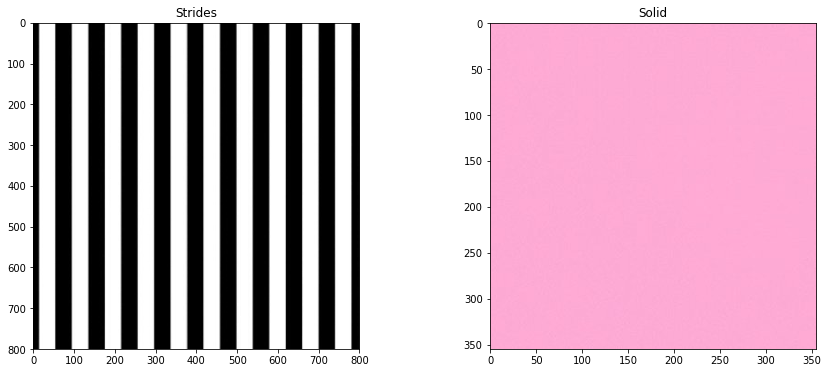

In [52]:
# read an image
image_strides = cv2.imread('example images/stripes.jpg')
# next, change color from BGR to RGB 
image_strides = cv2.cvtColor(image_strides, cv2.COLOR_BGR2RGB)

# then, read in another image and plot them side by side 
image_solid = cv2.imread('example images/pink_solid.jpg')
# next, change color from BGR to RGB 
image_solid = cv2.cvtColor(image_solid, cv2.COLOR_BGR2RGB)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.imshow(image_strides)
ax1.set_title('Strides')
ax2.imshow(image_solid)
ax2.set_title('Solid')

Next, convert images from RGB to GRAY scale and **normalize them, dividing by 255.0**.

In [54]:
gray_strides = cv2.cvtColor(image_strides, cv2.COLOR_RGB2GRAY)
gray_solid = cv2.cvtColor(image_solid, cv2.COLOR_RGB2GRAY)

norm_strides = gray_strides/255.0
norm_solid = gray_solid/255.0

Then, let's define a function to perform Fast Fourier Transformation. <br>
Input will be **normalized grayscale** image and output will be frequency spectrum transform (or magnitude spectrum of image).

In [55]:
def ft_image(norm_image):
    """
    function will return frequency spectrum from normalized grayscale image
    using Numpy library 
    """
    f = np.fft.fft2(norm_image) # fourier transform
    f_shift = np.fft.fftshift(f) # shift DC from top left corner to center 
    frequency_spec = 20*np.log(np.abs(f_shift)) 
    return frequency_spec

Now, we will **apply created function on images and plot side by side** with original. 

Text(0.5, 1.0, 'FT solid image')

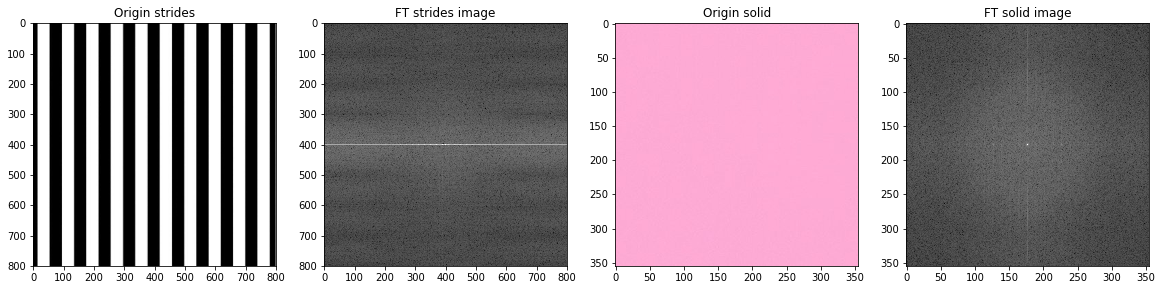

In [58]:
f_stripes = ft_image(norm_strides)
f_solid = ft_image(norm_solid)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,8))

ax1.imshow(image_strides)
ax1.set_title('Origin strides')

ax2.imshow(f_stripes, cmap = 'gray')
ax2.set_title('FT strides image')

ax3.imshow(image_solid)
ax3.set_title('Origin solid')

ax4.imshow(f_solid, cmap = 'gray')
ax4.set_title('FT solid image')

As we discussed **low frequencies are located at the center of an image**. <br>
Here we can see that "Solid" image (right) has most low-frequencies components (center point (DC) is brightest). <br>

IMPORTANT: In contrast, "Strides" image contains **low frequencies for white and black colors** and **high frequencies for edges in between those colors**. The fact, that we have a horizontal line of dots **highlights, that we deal with edges** over **x-axis**. <br>
**x-axis** is one dominating direction for those frequencies (**vertical strides shown by horizontal line**, that passes through the center of an image). 

Now, let's see how this rule applied on **complex real-world image**. 

Text(0.5, 1.0, 'FT birds image')

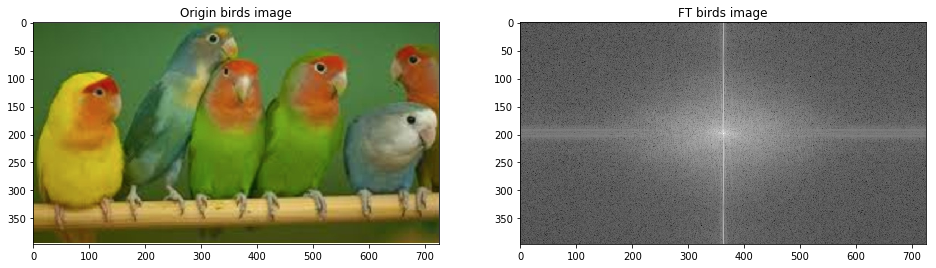

In [60]:
image_birds = cv2.imread('example images/birds.jpg')
image_birds = cv2.cvtColor(image_birds, cv2.COLOR_BGR2RGB)

# next convert to graysclae and normalize it 
gray_birds = cv2.cvtColor(image_birds, cv2.COLOR_RGB2GRAY)
gray_norm = gray_birds/ 255.0
# apply FT function of gray and normalized image 
f_gray = ft_image(gray_norm)

# print out results 
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,7))

ax1.imshow(image_birds)
ax1.set_title('Origin birds image')

ax2.imshow(f_gray, cmap = 'gray')
ax2.set_title('FT birds image')


Notice, that this image has **components of all frequencies (both high and low frequncies)**, that go in both vertical and horizontal directions.<br>
Bright DC point in the center highlights, that thre is a **large portion of low frequencies** in that image. <br>
This makes sence since bodies of birds and background are solid colors. <br>
Plus, we can conclude, that there are **two dominating directions of frequencies**: 
- First is birds bodies vertical edges (represented by horizontal line on frequencies spectrum);
- Second is horizontal branch and top of birds heads edges (represented by vertical line on frequencies spectrum). 

**Summary**:
 - **Vertical line** in Magnitude spectrum: horizontal edges in original image;
 - **Horizontal line** in Magnitude spectrum: vertical edges in original image. 